# TP4

## Linear regression

In [1]:
library(ISwR)
data(thuesen)

I <-! is.na(thuesen[,"short.velocity"])
Y<-thuesen[I,"short.velocity"]
X<-thuesen[I,"blood.glucose"]

In [2]:
# apply the mean square method "by hand"
dim(thuesen)

N <- length(Y)
x.bar <- mean(X)
y.bar <- mean(Y)
S.xy <- sum((X-x.bar)*Y)
S.xx <- sum((X-x.bar)^2)


beta.hat.1 <- S.xy/S.xx

beta.hat.0 <- y.bar-beta.hat.1*x.bar

print(paste("beta.hat.0 = ", beta.hat.0))
print(paste("beta.hat.1 = ", beta.hat.1))

[1] 24  2

[1] "beta.hat.0 =  1.09781487777238"
[1] "beta.hat.1 =  0.0219625222599968"


In [3]:
# test the hypothesis β1=0 using an F-test using equation (Eq. 3)
Y.hat<-beta.hat.0+beta.hat.1*X
SS.mod <- sum((Y.hat-mean(Y))^2)
SS.res <- sum((Y-Y.hat)^2)
F.value <- SS.mod/(SS.res/(N-2))
F.pr<-(1-pf(F.value,df1=1,df2=N-2))

print(paste("F-test result: F.value= ", F.value))
print(paste("Pr[F >= F.value]= ", F.pr))

[1] "F-test result: F.value=  4.41401843314627"
[1] "Pr[F >= F.value]=  0.0478959109075709"


In [4]:
#
var.hat.w <- sum((Y-Y.hat)^2)/(N-2)
beta <- 0
t.value <- (beta.hat.1-beta)*sqrt(S.xx)/(sqrt(var.hat.w))
t.pr <- (1-pt(t.value,df=N-2))*2

print(paste("t-test result: t.value= ",t.value))
print(paste("Pr[|T| >= t.value]= ", t.pr))

[1] "t-test result: t.value=  2.10095655194158"
[1] "Pr[|T| >= t.value]=  0.0478959109075709"


## Multiple regression

In [6]:
rm(list=ls())
library(MASS)

# initial values for n, (sigma_w) and beta
n<-3 # number of input variables
p<-n+1
beta<-seq(2,p+1) # beta =(2,3,...,n+2)
sd.w<-5  

# generating data D_N
N<-100 # number of samples
X<-array(runif(N*n,min=-20,max=20),c(N,n)) # now N=300
X<-cbind(array(1,c(N,1)),X)


R<-100#00 # number of iterations
beta.hat<-array(0,c(p,R))
var.hat.w<-numeric(R)
Y.hat<-array(NA,c(R,N))

In [9]:
# Compute Ŷ,  β̂ and σ
# computation beta, Y and sigma_w
for (r in 1:R){
  Y <- X%*%beta+rnorm(N,sd=sd.w)
 
  beta.hat[,r]<-ginv(t(X)%*%X)%*%t(X)%*%Y

  Y.hat[r,] <- X%*%beta.hat[,r]
  e <- Y-Y.hat[r,]
  var.hat.w[r] <- (t(e)%*%e)/(N-p)
}

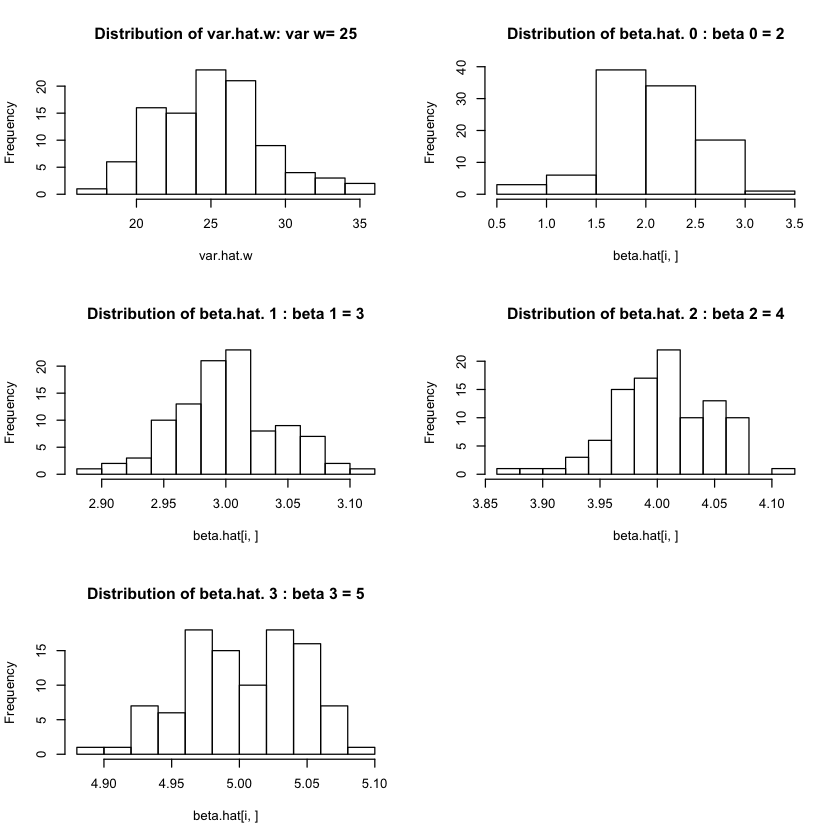

In [10]:
# Plot the histograms for  σ̂ and for each  β̂ 
par(mfrow=c(3,2))
hist(var.hat.w,main=paste("Distribution of var.hat.w: var w=", sd.w^2))
for (i in 1:p){
  hist(beta.hat[i,], main=paste("Distribution of beta.hat.",i-1,": beta",i-1,"=", beta[i]))
}
# linear modeling, the coeficients we have are unbiased
# look at the distribution
# THINK... it's my estimation biased? unbiased? what are the differences?

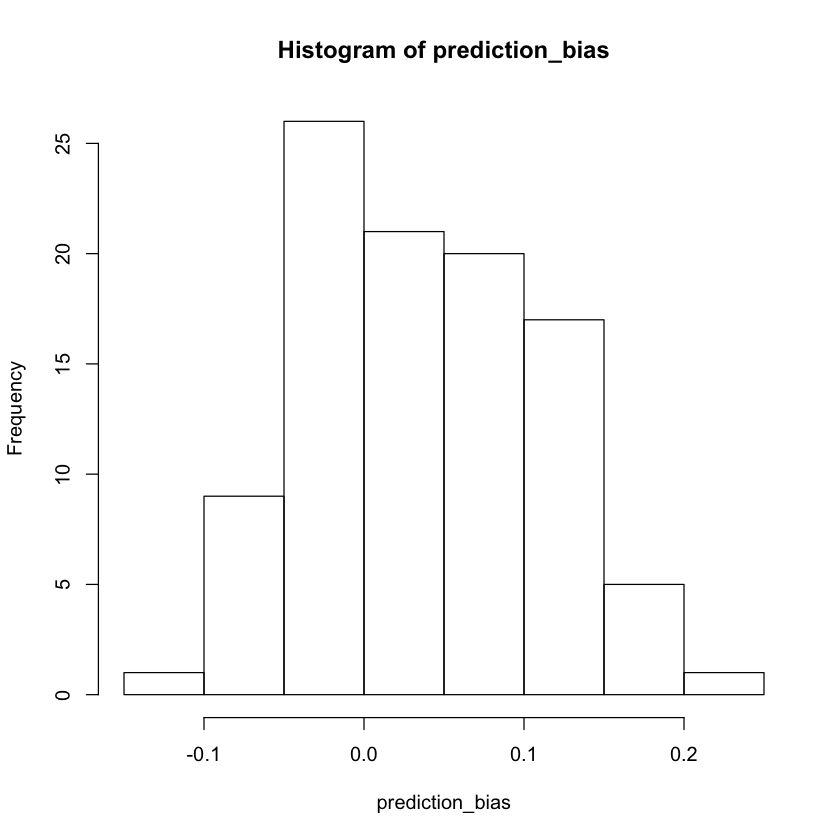

In [11]:
# histograms of the prediction bias 
prediction_bias<-apply(Y.hat,2,mean)-X%*%beta
hist(prediction_bias)

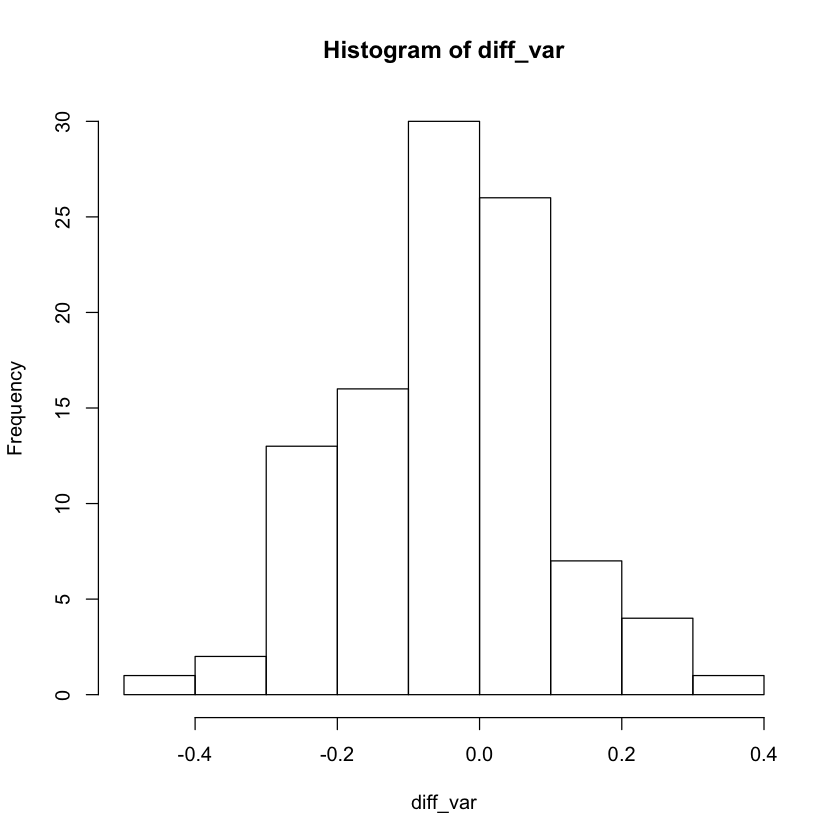

In [12]:
# comparison of analytic variance and that of the simulated prediction
diff_var<-numeric(N)
for (i in 1:N){
  diff_var[i]=var(Y.hat[,i])-sd.w^2*(t(X[i,])%*%ginv(t(X)%*%X)%*%X[i,])
}
hist(diff_var)